### (2) Fine-tuned BERT Model

#### I. Fine-tuning Process

In [ ]:
bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
senti_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
dataset_train = Dataset.from_pandas(df_train)
dataset_val = Dataset.from_pandas(df_val)
dataset_test = Dataset.from_pandas(df_test)

dataset_train = dataset_train.map(lambda e: senti_tokenizer(e['News_Headline'], truncation=True, padding='max_length', max_length=512), batched=True)
dataset_val = dataset_val.map(lambda e: senti_tokenizer(e['News_Headline'], truncation=True, padding='max_length', max_length=512), batched=True)
dataset_test = dataset_test.map(lambda e: senti_tokenizer(e['News_Headline'], truncation=True, padding='max_length' , max_length=512), batched=True)

dataset_train.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'f1_score' : f1_score(predictions, labels, average='micro')}

args = TrainingArguments(
        output_dir='temp/',
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        num_train_epochs=5,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='f1_score',
)

trainer = Trainer(
        model=bert,                          # the instantiated Transformers model to be trained
        args=args,                           # training arguments, defined above
        train_dataset=dataset_train,         # training dataset
        eval_dataset=dataset_val,            # evaluation dataset
        compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3924
  Num Epochs = 5
  Instantaneous 

Epoch,Training Loss,Validation Loss,F1 Score
1,No log,0.916601,0.874142
2,No log,0.925289,0.867277
3,No log,0.953899,0.864989
4,No log,1.005075,0.869565
5,0.019400,0.996326,0.867277


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 437
  Batch size = 32
Saving model checkpoint to temp/checkpoint-123
Configuration saved in temp/checkpoint-123/config.json
Model weights saved in temp/checkpoint-123/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 437
  Batch size = 32
Saving model checkpoint to temp/checkpoint-246
Configuration saved in

TrainOutput(global_step=615, training_loss=0.0177448474294771, metrics={'train_runtime': 472.1569, 'train_samples_per_second': 41.554, 'train_steps_per_second': 1.303, 'total_flos': 5162285255823360.0, 'train_loss': 0.0177448474294771, 'epoch': 5.0})

In [ ]:
bert.eval()
trainer.predict(dataset_test).metrics

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, News_Headline. If __index_level_0__, News_Headline are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 485
  Batch size = 32


{'test_loss': 1.0178207159042358,
 'test_f1_score': 0.8659793814432989,
 'test_runtime': 3.5413,
 'test_samples_per_second': 136.955,
 'test_steps_per_second': 4.518}

In [ ]:
trainer.save_model('BERT_fine_tuned_1')

Saving model checkpoint to BERT_fine_tuned_1
Configuration saved in BERT_fine_tuned_1/config.json
Model weights saved in BERT_fine_tuned_1/pytorch_model.bin


#### II. Evaluate the Fine-tuned BERT Model

In [ ]:
tuned_bert_model = BertForSequenceClassification.from_pretrained('BERT_fine_tuned_1', id2label={0: 'Neutral', 1: 'Positive', 2: 'Negative'})
senti_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

loading configuration file BERT_fine_tuned_1/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Neutral",
    "1": "Positive",
    "2": "Negative"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file BERT_fine_tune

In [ ]:
tuned_bert_model.config.id2label

{0: 'Neutral', 1: 'Positive', 2: 'Negative'}

In [ ]:
neutral = list()
positive = list()
negative = list()
for i in range(len(test_set)):
  inputs = senti_tokenizer(test_set.iloc[i, 0], padding=True, truncation=True, max_length=512, return_tensors='pt') #tokenize text to be sent to model
  outputs = tuned_bert_model(**inputs)
  predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
  neutral.append(predictions[0][0].tolist())
  positive.append(predictions[0][1].tolist())
  negative.append(predictions[0][2].tolist())

In [ ]:
df_array = np.array(test_set)
df_list = list(df_array[:, 0])
table = {'News_Headline':df_list, "Positive":positive, "Negative":negative, "Neutral":neutral}      
result_ft_BERT = pd.DataFrame(table, columns = ["News_Headline", "Positive", "Negative", "Neutral"])
result_ft_BERT['Prediction'] = result_ft_BERT[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)
result_ft_BERT['label'] = test_set['label'].copy()
result_ft_BERT

,News_Headline,Positive,Negative,Neutral,Prediction,label
0,"Of this , EUR 38.8 mn was net interest income .",0.000036,0.000010,0.999953,Neutral,Neutral
1,The government has instead proposed an exchang...,0.000028,0.000007,0.999965,Neutral,Neutral
2,"Nordea Pankki Suomi Oyj , according to previou...",0.000185,0.000007,0.999808,Neutral,Neutral
3,Under the agreement GeoSentric will provide Gy...,0.000636,0.000007,0.999357,Neutral,Positive
4,Both operating profit and turnover for the six...,0.999849,0.000013,0.000137,Positive,Positive
...,...,...,...,...,...,...
917,"Finnish Suominen Flexible Packaging Ltd , owne...",0.000050,0.000008,0.999942,Neutral,Negative
918,"Alma Media holds 70 % of this company , the re...",0.000019,0.000007,0.999974,Neutral,Neutral
919,Less than ten people will face pension agreeme...,0.000017,0.000565,0.999418,Neutral,Neutral
920,"Purchase it for the 12MP snapper , if nothing ...",0.000041,0.000011,0.999948,Neutral,Neutral


              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       115
     Neutral       0.90      0.90      0.90       548
    Positive       0.82      0.82      0.82       259

    accuracy                           0.87       922
   macro avg       0.86      0.86      0.86       922
weighted avg       0.87      0.87      0.87       922



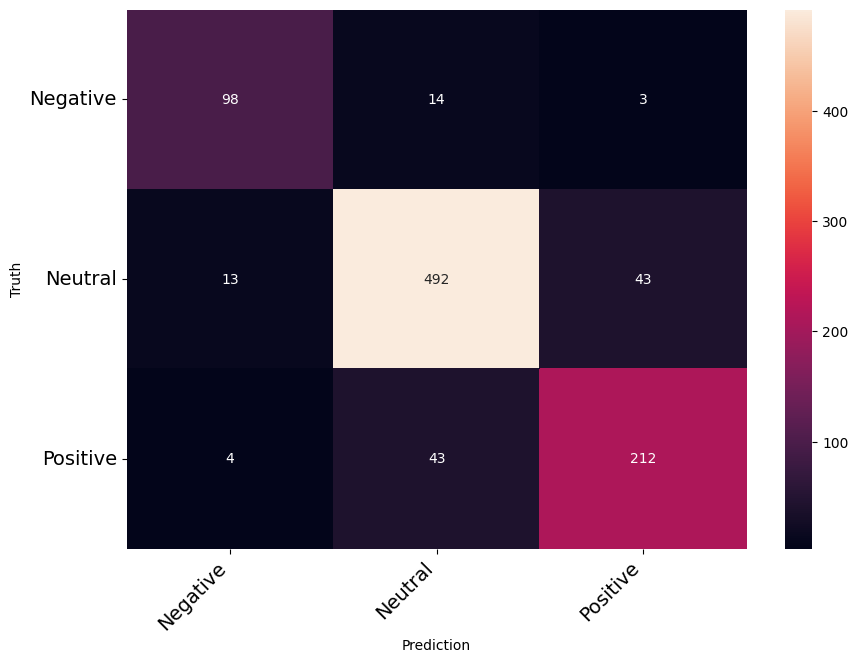

In [ ]:
print(classification_report(result_ft_BERT['label'], result_ft_BERT['Prediction']))
print_confusion_matrix(confusion_matrix(result_ft_BERT['label'], result_ft_BERT['Prediction']), ['Negative', 'Neutral', 'Positive'])

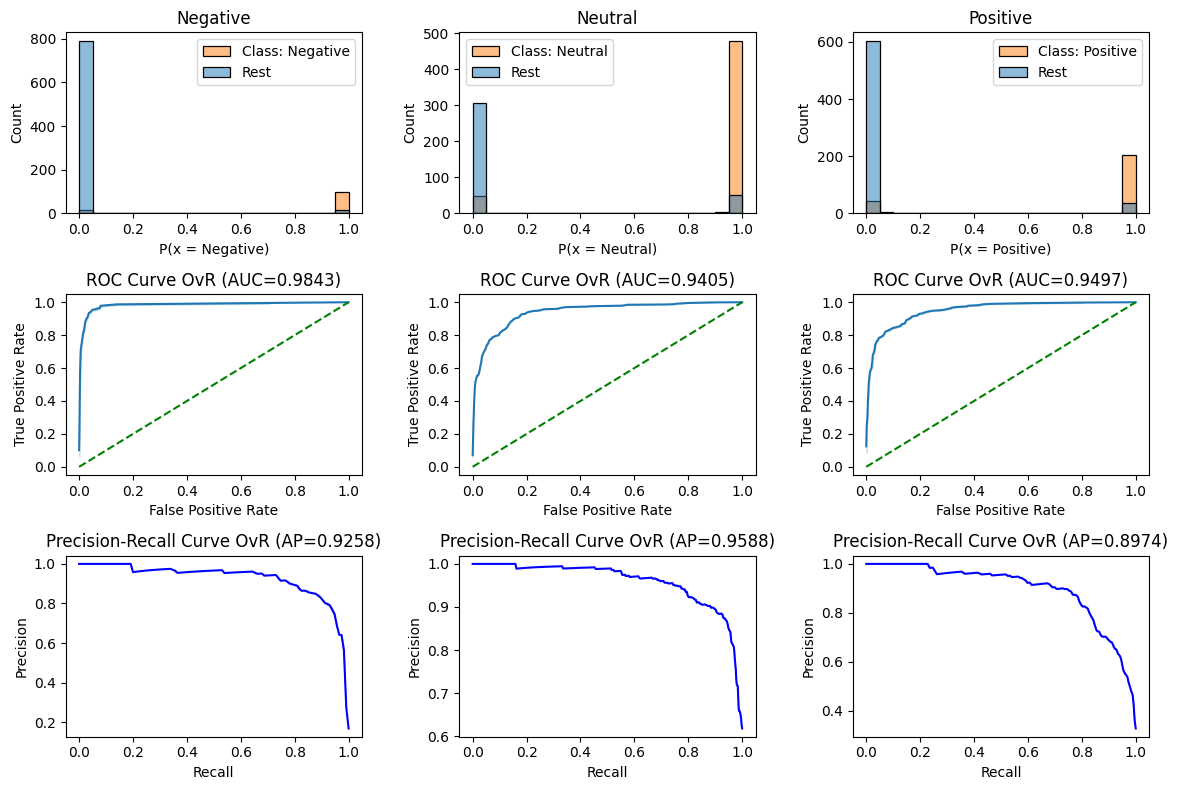

In [ ]:
plot_roc_pr_ovr(result_ft_BERT)